In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

import random
import re   
import string                          

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
# Load Data
data = pd.read_csv('final_merged_ML.csv')

In [3]:
data.head(20)

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,"He isn't as big, but he's still quite popular....",anger,GoEmotions,0.6297,PRON AUX PART ADV ADJ PUNCT CCONJ PRON AUX ADV...,"{'thing': 0.2437374037277606, 'isn': 0.2656963...","[0.051135429411765, 0.187066294117647, -0.2254...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,That's crazy; I went to a super [RELIGION] hig...,happiness,GoEmotions,0.3612,DET AUX ADJ PUNCT PRON VERB ADP DET ADJ X X X ...,"{'crazy': 0.25002624126708245, 'went': 0.24542...","[0.020726478260870, 0.189336652173913, -0.2070...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
7,that's adorable asf,happiness,GoEmotions,0.4939,DET AUX ADJ NOUN,{'adorable': 1.0},"[0.001526666666667, -0.228283333333333, -0.279...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",happiness,GoEmotions,0.6900,PUNCT PROPN PROPN PROPN PROPN PROPN PROPN NOUN...,"{'pubs': 0.49146760427711866, 'haha': 0.287066...","[-0.113747111111111, 0.128978777777778, -0.168...","AAa, GURR",NaN,NaN,...,2.0,0.0,0.0,0.0,0.0,1,0,0,0,0
9,"I have, and now that you mention it, I think t...",neutral,GoEmotions,0.0000,PRON AUX PUNCT CCONJ ADV SCONJ PRON VERB PRON ...,"{'think': 0.3544605445834518, 'mention': 0.637...","[-0.004555307692308, 0.189031692307692, -0.296...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [4]:
def clean_text(sentence):
    text = str(sentence).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', sentence)  # Remove special characters
    return sentence

In [5]:
data['sentence'] = data['sentence'].astype(str)

In [6]:
data['clean_sentence'] = data['sentence'].apply(clean_text)

In [7]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP,clean_sentence
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,That game hurt.
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Man I love reddit.
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,1.0,1.0,0.0,0.0,0,1,1,0,0,"Etenia was nowhere near them, he was by the Fa..."
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Right? Considering it's such an important docu...


In [14]:
# NLP Features Extraction
vectorizer_tfidf = TfidfVectorizer()
vectorizer_count = CountVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(data['sentence'])
X_count = vectorizer_count.fit_transform(data['sentence'])

In [15]:
# Include additional NLP features
sentiment_scores = data[['Sentiment_Score']].values 

In [33]:
emotion = sorted(data['emotion'].unique())

In [16]:
data.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP,clean_sentence
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'game': 0.6107402745180438, 'hurt': 0.7918309...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,That game hurt.
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'right': 0.27278835247077626, 'don': 0.226821...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Man I love reddit.
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.7044442094807741, 'near': 0.70975...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,1.0,1.0,0.0,0.0,0,1,1,0,0,"Etenia was nowhere near them, he was by the Fa..."
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.18498978995980117, 'considering': ...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,Right? Considering it's such an important docu...


In [17]:
# Merge all features
scaler = MinMaxScaler()
X_combined = scaler.fit_transform(np.hstack((X_tfidf.toarray(), X_count.toarray(), sentiment_scores)))

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, data['emotion'], test_size=0.2, random_state=42)

In [20]:
# Naive Bayes
nb = MultinomialNB()

In [21]:
nb.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred_nb = nb.predict(X_test)

In [23]:
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("F1-score:", nb_f1)

F1-score: 0.435796523121881


In [24]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", nb_accuracy)

Accuracy: 0.4801176398504994


In [25]:
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
print("Precision:", nb_precision)

Precision: 0.44434021366185034


In [26]:
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
print("Recall:", nb_recall)

Recall: 0.4801176398504994


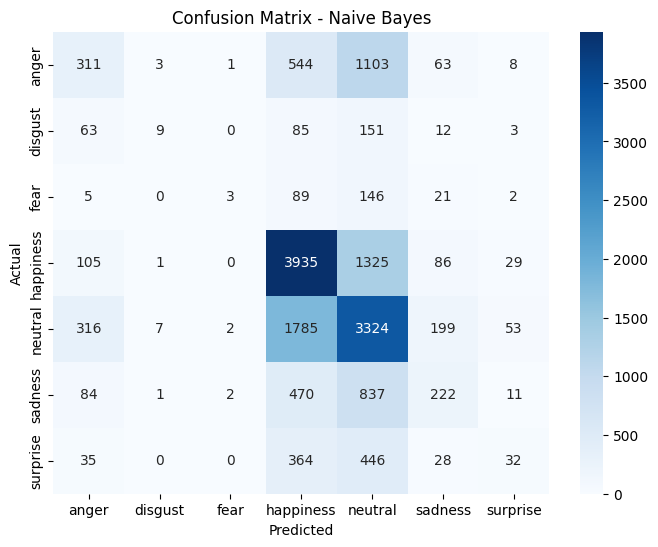

In [34]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion, yticklabels=emotion)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()